In [51]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

(1172, 1)


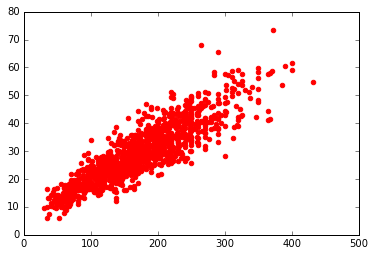

In [87]:
#Read data
data = pd.read_csv('Dados-medicos.txt', sep='\s+')
data_array = data.as_matrix()
x = data_array[:,2].reshape((data_array.shape[0], 1))
y = data_array[:,3].reshape((data_array.shape[0], 1))
print(y.shape)
plt.scatter(x, y, color=['red'])

In [183]:
def createX(x_raw, dimension):
    x = np.zeros((x_raw.shape[0], dimension+1))
    for i in range(dimension+1):
        for j in range(x.shape[0]):
            x[j,dimension-i] = x_raw[j,0]**i
    return x

In [184]:
def createWeights(x, y):
    x_inv = np.linalg.pinv(x)
    w = np.dot(x_inv, y)
    w = w.reshape(w.shape[0], 1)
    return w

(3, 1)

In [187]:
def estimateY(x, w):
    y = np.dot(x,w)
    return y

In [256]:
def NLL(x, y, w):
    temp = np.transpose(y - np.dot(x,w))
    nll = np.dot(temp, (y - np.dot(x,w)))
    return nll/2

In [351]:
dimensions = 1
x_vec = data_array[:,2].reshape((data_array.shape[0], 1))
y_vec = data_array[:,3].reshape((data_array.shape[0], 1))
x = createX(x_vec, dimensions)
w = createWeights(x, y_vec)
y_est = estimateY(x, w)
nll = NLL(x,y_vec,w)

print('d: ', dimensions)
print('w: ', w.tolist())
print('NLL(w): ',  nll.tolist())

('d: ', 1)
('w: ', [[0.13153934263406897], [6.734247834098285]])
('NLL(w): ', [[14745.110479239818]])


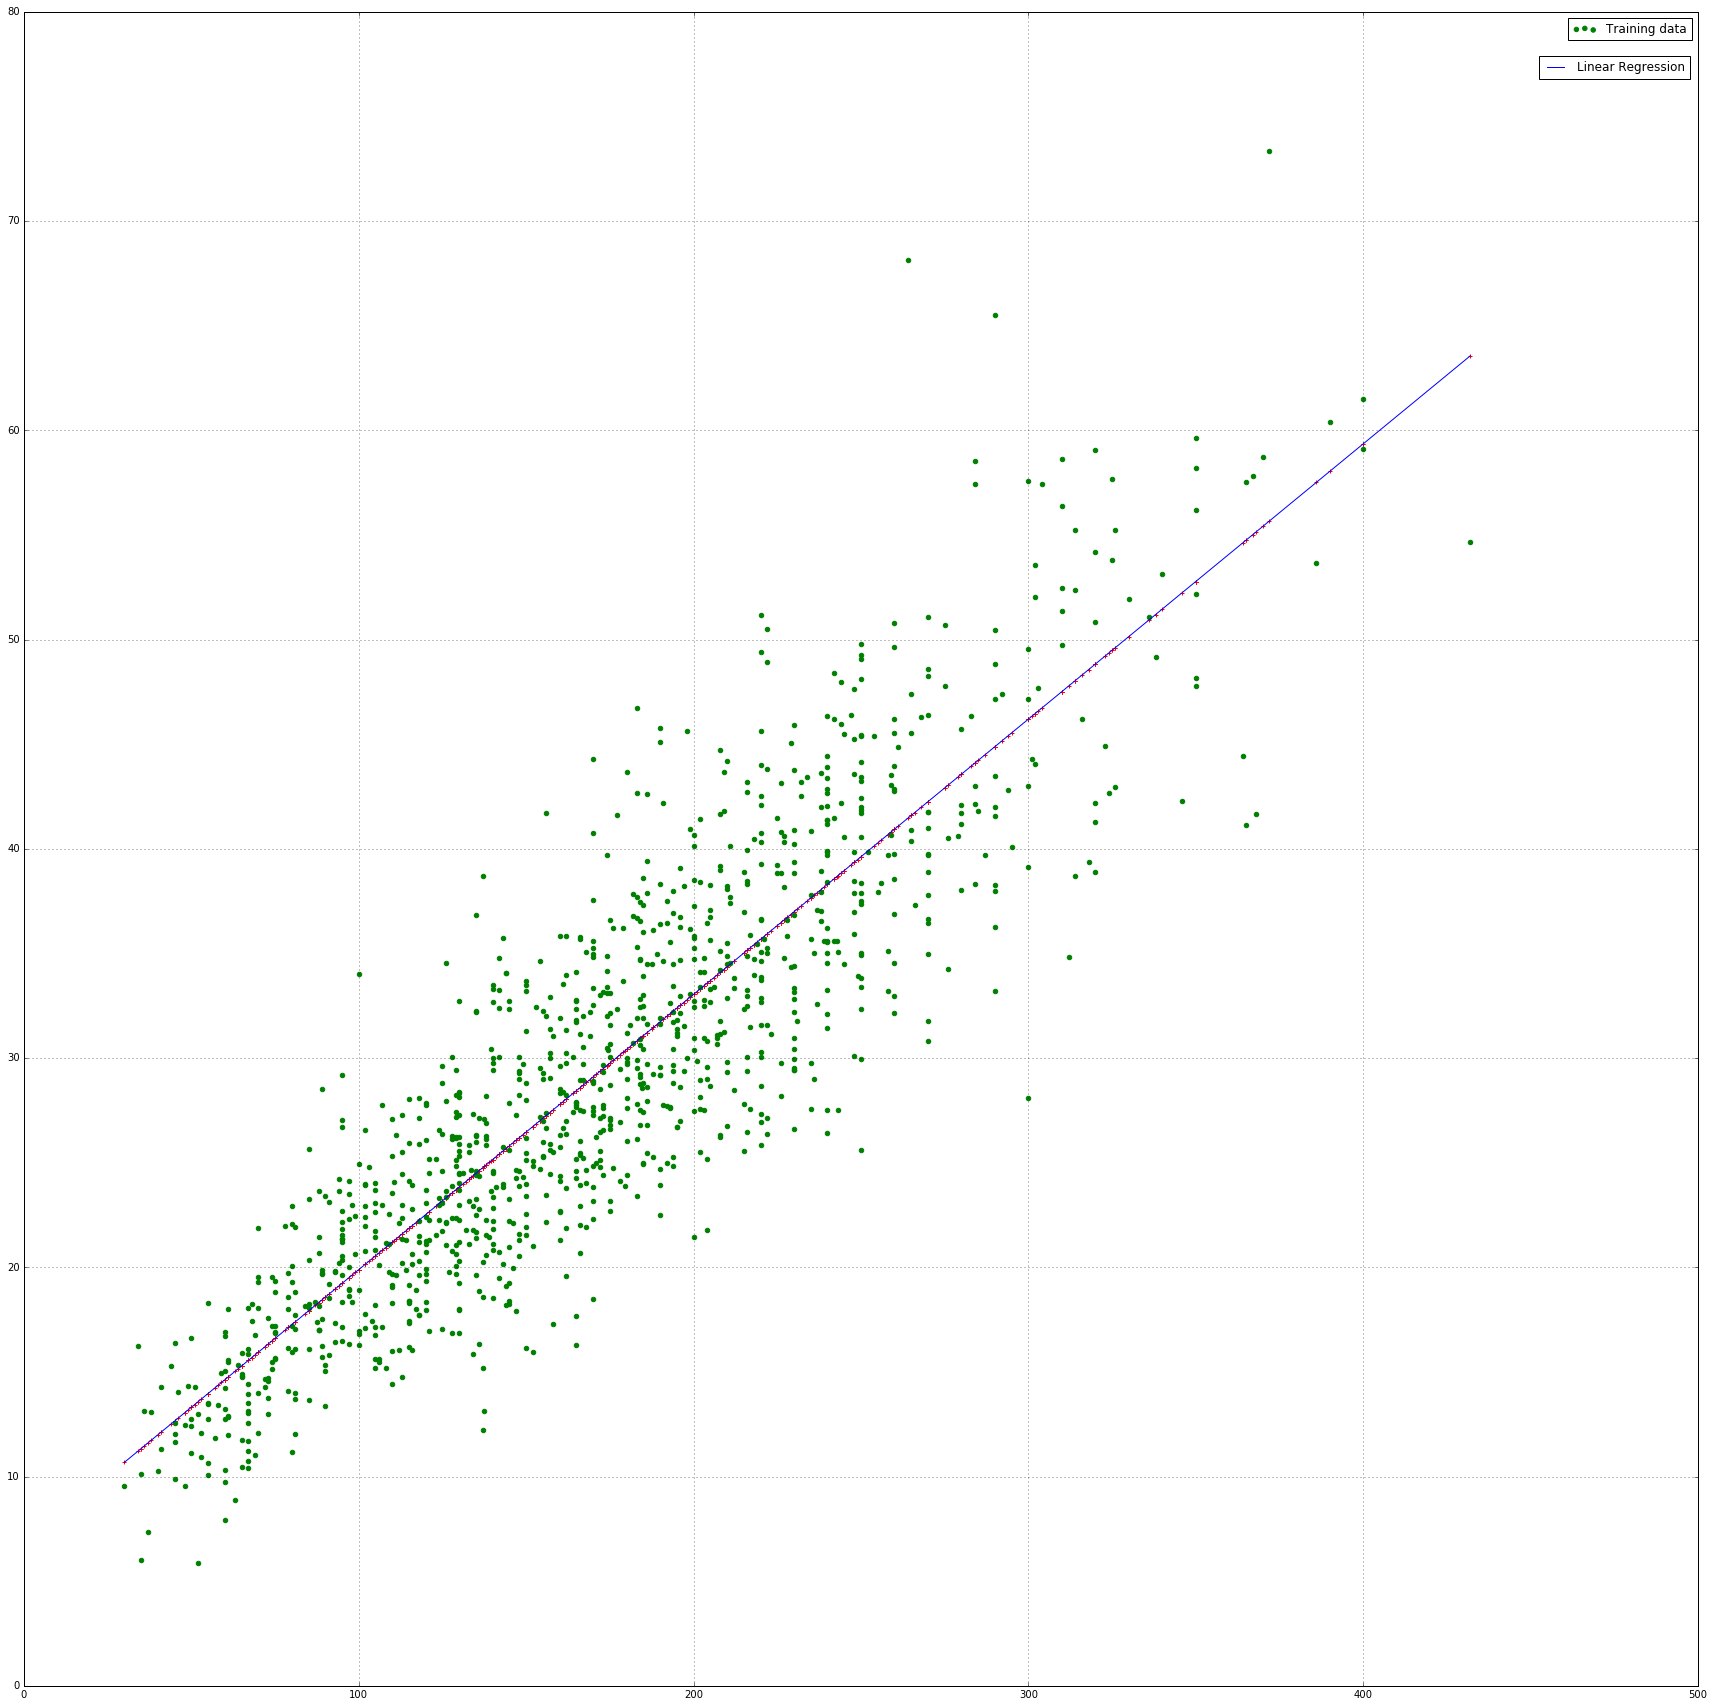

In [352]:
plt.figure(figsize=(30,30))
plt.grid()
plt.scatter(x_vec, y_est, marker='+', color='red')
regression_line = plt.plot([np.min(x_vec), np.max(x_vec)], [np.min(y_est), np.max(y_est)], 'b-', label="Linear Regression", linewidth=1)
train_data = plt.scatter(data_array[:,2], data_array[:,3], color=['green'])
legend1 = plt.legend(handles=regression_line, loc=(.905,.96))
legend2 = plt.legend([train_data, regression_line], ['Training data'])

ax = plt.gca().add_artist(legend1)
plt.savefig('plot.png')